# Tent & Norm Adaptation

In [1]:
import pandas as pd

record = pd.read_csv('./result/audio-mnist/tent/pre_train/training_records.csv')
record.head()

,Unnamed: 0,type,step,accuracy,loss
0,0,train,0,12.5000,2.299448
1,1,train,1,9.3750,2.300853
2,2,train,2,15.6250,2.295353
3,3,train,3,14.0625,2.295773
4,4,train,4,15.6250,2.294219


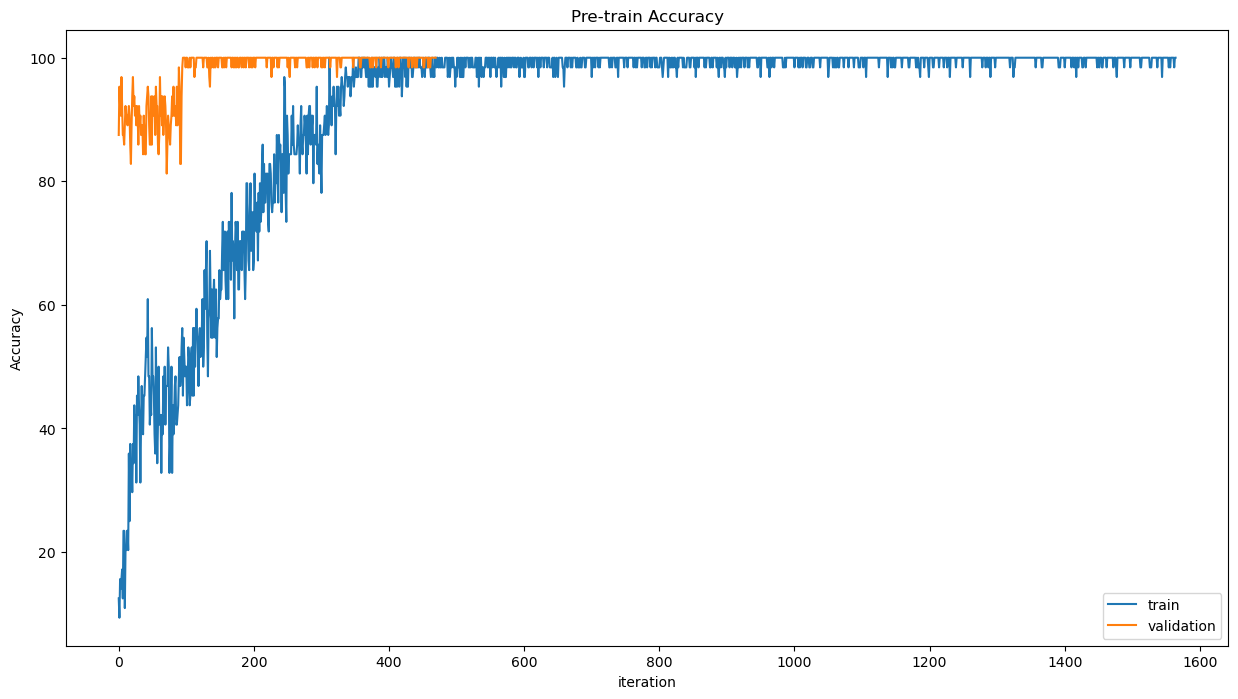

In [2]:
import matplotlib.pyplot as plt

train_record = record[record['type'] == 'train']
val_record = record[record['type'] == 'validation']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='train')
plt.plot(val_record['step'], val_record['accuracy'], label='validation')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

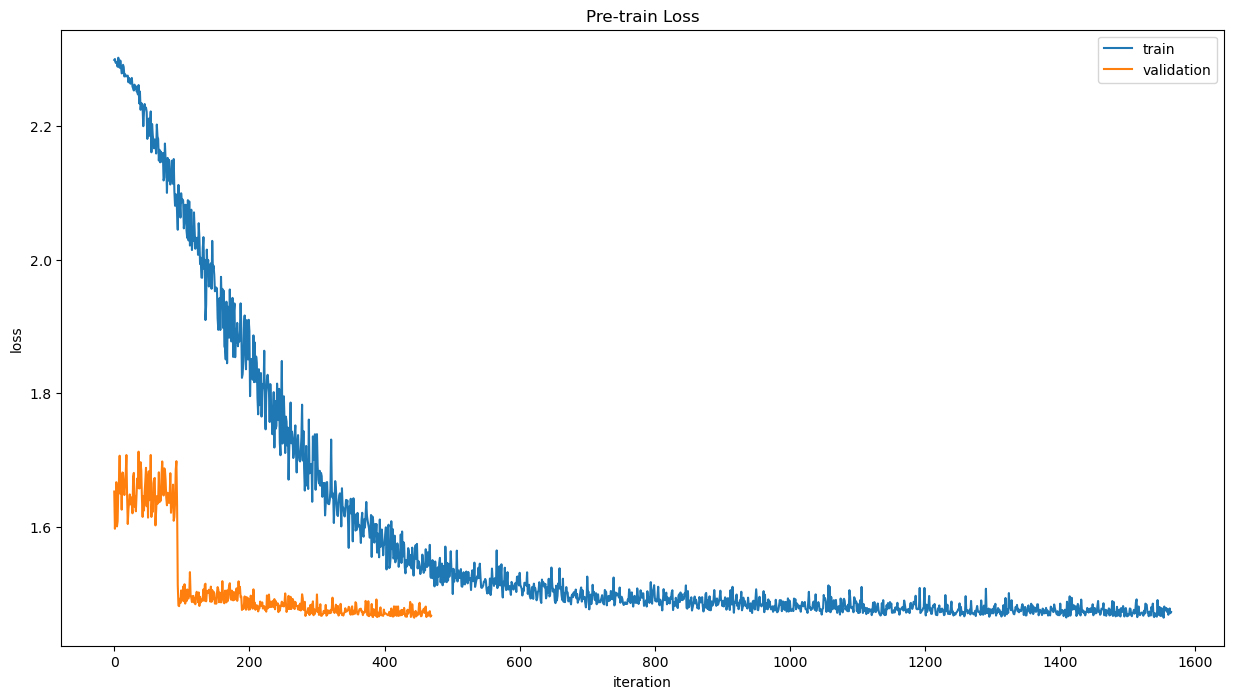

In [3]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='train')
plt.plot(val_record['step'], val_record['loss'], label='validation')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test-Time Training (TTT)

In [4]:
record = pd.read_csv('./result/audio-mnist/ttt/pre_time_shift_train/ts_bn_accu_record.csv')
record.head()

,Unnamed: 0,dataset,type,step,accuracy,loss
0,0,audio-mnist,cls,0,10.317460,2.365511
1,1,audio-mnist,ssh,0,38.359788,1.096718
2,2,audio-mnist,cls,1,11.111111,2.283417
3,3,audio-mnist,ssh,1,74.074074,0.809246
4,4,audio-mnist,cls,2,15.873016,2.236067


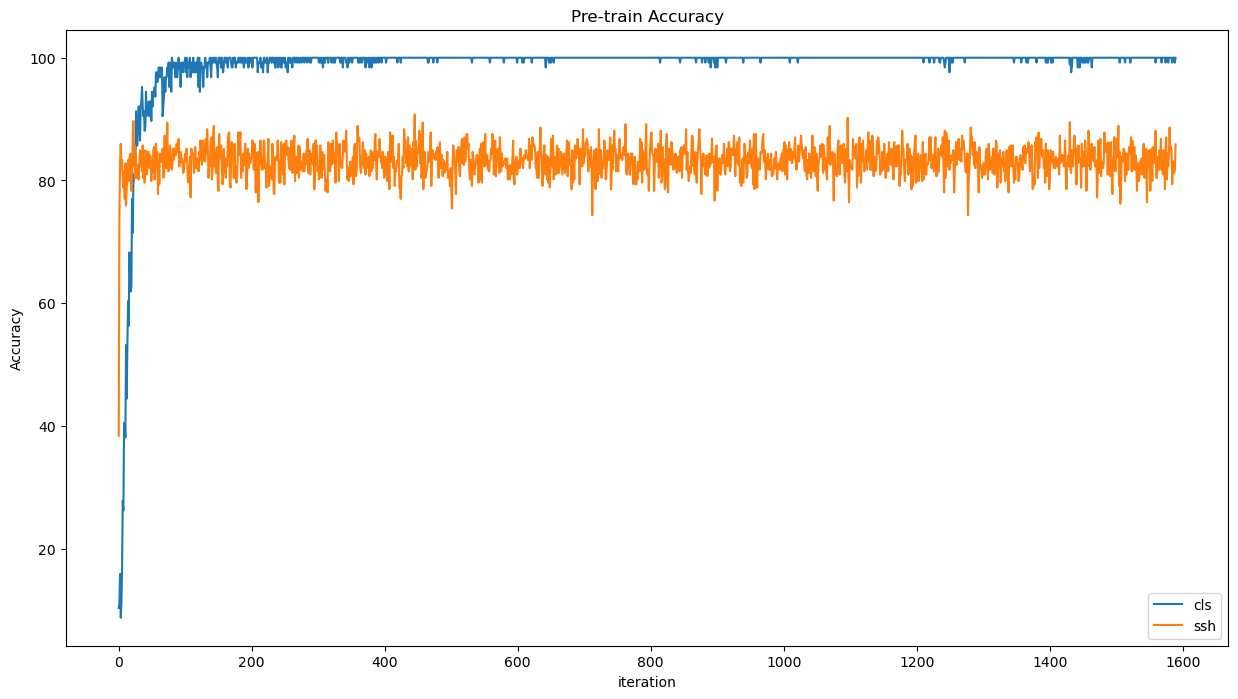

In [5]:
train_record = record[record['type'] == 'cls']
val_record = record[record['type'] == 'ssh']
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['accuracy'], label='cls')
plt.plot(val_record['step'], val_record['accuracy'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Pre-train Accuracy')
plt.legend(loc='lower right')
plt.show()

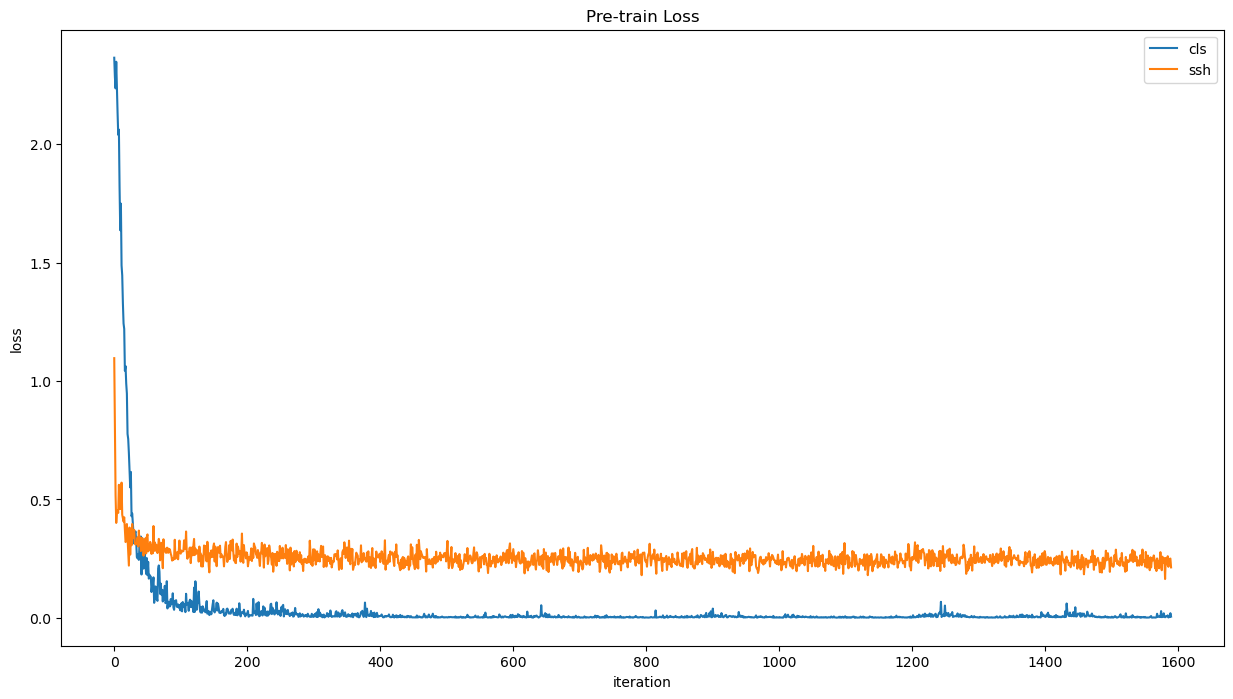

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(train_record['step'], train_record['loss'], label='cls')
plt.plot(val_record['step'], val_record['loss'], label='ssh')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Pre-train Loss')
plt.legend()
plt.show()

# Test dataset accuracy comparing

In [7]:
import os

def combine_csvs(root_path: str) -> pd.DataFrame:
    records = []
    for sub_path in os.listdir(root_path):
        if 'accuracy_record' in sub_path and sub_path.endswith('.csv'):
            record = pd.read_csv(os.path.join(root_path, sub_path), index_col=0)
            records.append(record)
    return pd.concat(records, axis=0, ignore_index=True)

tent_analysis_root_path = './result/audio-mnist/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,cnn,NaN,NaN,96.09,3.91,0.0000,25404
1,audio-mnist,cnn,NaN,gaussian_noise,11.20,88.80,0.0025,25404
2,audio-mnist,cnn,Tent Adaptation,gaussian_noise,79.40,20.60,0.0025,25404
3,audio-mnist,cnn,Norm Adaptation,gaussian_noise,78.97,21.03,0.0025,25404
4,audio-mnist,cnn,NaN,NaN,96.23,3.77,0.0000,25404
5,audio-mnist,cnn,NaN,gaussian_noise,10.04,89.96,0.0050,25404
6,audio-mnist,cnn,Tent Adaptation,gaussian_noise,67.02,32.98,0.0050,25404
7,audio-mnist,cnn,Norm Adaptation,gaussian_noise,66.86,33.14,0.0050,25404
8,audio-mnist,restnet50,NaN,NaN,95.56,4.44,0.0000,25567042
9,audio-mnist,restnet50,NaN,gaussian_noise,32.46,67.54,0.0025,25567042


In [8]:
ttt_analysis_root_path = './result/audio-mnist/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_time_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,96.27,3.73,0.0000,737005
1,audio-mnist,RestNet_base,NaN,gaussian_noise,37.66,62.34,0.0050,737005
2,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,60.17,39.83,0.0050,737005
3,audio-mnist,RestNet_base,NaN,NaN,96.34,3.66,0.0000,737005
4,audio-mnist,RestNet_base,NaN,gaussian_noise,48.46,51.54,0.0025,737005
5,audio-mnist,RestNet_base,"TTT, ts, bn, online",gaussian_noise,71.48,28.52,0.0025,737005


In [9]:
ttt_analysis_root_path = './result/audio-mnist/ttt/angles_shift_analysis'
ttt_angles_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_angles_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,RestNet_base,NaN,NaN,98.49,1.51,0.0000,740078
1,audio-mnist,RestNet_base,NaN,gaussian_noise,35.88,64.12,0.0050,740078
2,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,44.07,55.93,0.0050,740078
3,audio-mnist,RestNet_base,NaN,NaN,98.43,1.57,0.0000,740078
4,audio-mnist,RestNet_base,NaN,gaussian_noise,60.99,39.01,0.0025,740078
5,audio-mnist,RestNet_base,"TTT, as, bn, online",gaussian_noise,74.35,25.65,0.0025,740078


In [10]:
conmix_analysis_root_path = './result/audio-mnist/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,audio-mnist,ViT,NaN,NaN,97.21,2.79,0.0000,103687828
1,audio-mnist,ViT,NaN,gaussian_noise,67.71,32.29,0.0025,103687828
2,audio-mnist,ViT,CoNMix,gaussian_noise,97.94,2.06,0.0025,103687828
3,audio-mnist,ViT,NaN,NaN,97.46,2.54,0.0000,103687828
4,audio-mnist,ViT,NaN,gaussian_noise,64.27,35.73,0.0050,103687828
5,audio-mnist,ViT,CoNMix,gaussian_noise,94.80,5.20,0.0050,103687828


# AudioMNIST: 0.0025 Severity Level Analysis

In [11]:
def search(df: pd.DataFrame, dataset=None, algorithm=None, tta_operation=None, corruption=None, severity_level=None):
    if dataset is not None:
        if dataset is not pd.NA:
            df = df[df['dataset'] == dataset]
        else:
            df = df[df['dataset'].isna()]
    if algorithm is not None:
        if algorithm is not pd.NA:
            df = df[df['algorithm'] == algorithm]
        else:
            df = df[df['algorithm'].isna()]
    if tta_operation is not None:
        if tta_operation is not pd.NA:
            df = df[df['tta-operation'] == tta_operation]
        else:
            df = df[df['tta-operation'].isna()]
    if corruption is not None:
        if corruption is not pd.NA:
            df = df[df['corruption'] == corruption]
        else:
            df = df[df['corruption'].isna()]
    if severity_level is not None:
        if severity_level is not pd.NA:
            df = df[df['severity level'] == severity_level]
        else:
            df = df[df['severity level'].isna()]
    return df

model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.0025, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.0025)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,96.09,11.20,79.40
1,tent adapt,RestNet50+,25567042,95.56,32.46,92.32
2,norm adapt,cnn,25404,96.09,11.20,78.97
3,norm adapt,RestNet50+,25567042,95.56,32.46,90.01
4,TTT,Transfer Learning by time shift,737005,96.27,48.46,71.48
5,CoNMix,R50+ViT-B_16,103687828,97.21,67.71,97.94


# AudioMNIST: 0.005 Severity Level Analysis

In [12]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
# model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by angle shift', ttt_angles_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    # search(ttt_angles_shift_records, tta_operation='TTT, as, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    ])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,25404,96.09,10.04,67.02
1,tent adapt,RestNet50+,25567042,95.56,31.11,84.68
2,norm adapt,cnn,25404,96.09,10.04,66.86
3,norm adapt,RestNet50+,25567042,95.56,31.11,80.66
4,TTT,Transfer Learning by time shift,737005,96.27,37.66,60.17
5,CoNMix,R50+ViT-B_16,103687828,97.21,64.27,94.80


# Speech Commands Datasets Analysis

In [13]:
tent_analysis_root_path = './result/speech-commands/tent/analysis'
tent_analysis_records = combine_csvs(tent_analysis_root_path)
tent_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,cnn,NaN,NaN,63.145574,36.854426,0.000,26704
1,speech-commands,cnn,NaN,gaussian_noise,60.936357,39.063643,0.005,26704
2,speech-commands,cnn,Tent Adaptation,gaussian_noise,19.107535,80.892465,0.005,26704
3,speech-commands,cnn,Norm Adaptation,gaussian_noise,19.341624,80.658376,0.005,26704
4,speech-commands,restnet50,NaN,NaN,86.598391,13.401609,0.000,25587062
5,speech-commands,restnet50,NaN,gaussian_noise,68.544257,31.455743,0.005,25587062
6,speech-commands,restnet50,Tent Adaptation + normalized,gaussian_noise,41.887345,58.112655,0.005,25587062
7,speech-commands,restnet50,Norm Adaptation + normalized,gaussian_noise,34.162399,65.837601,0.005,25587062
8,speech-commands,restnet50,NaN,NaN,86.583760,13.416240,0.000,25587062
9,speech-commands,restnet50,NaN,doing_the_dishes,37.615216,62.384784,1.000,25587062


In [14]:
ttt_analysis_root_path = './result/speech-commands/ttt/time_shift_analysis'
ttt_time_shift_records = combine_csvs(ttt_analysis_root_path)
ttt_time_shift_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,RestNet50_base,NaN,NaN,96.064375,3.935625,0.000,1518209
1,speech-commands,RestNet50_base,NaN,gaussian_noise,95.713241,4.286759,0.005,1518209
2,speech-commands,RestNet50_base,NaN,NaN,96.079005,3.920995,0.000,1518209
3,speech-commands,RestNet50_base,NaN,doing_the_dishes,75.669349,24.330651,1.000,1518209
4,speech-commands,RestNet50_base,"TTT, ts, bn, online",doing_the_dishes,75.918069,24.081931,1.000,1518209
5,speech-commands,RestNet50_base,NaN,exercise_bike,78.273592,21.726408,1.000,1518209
6,speech-commands,RestNet50_base,"TTT, ts, bn, online",exercise_bike,76.561814,23.438186,1.000,1518209
7,speech-commands,RestNet50_base,NaN,running_tap,82.472568,17.527432,1.000,1518209
8,speech-commands,RestNet50_base,"TTT, ts, bn, online",running_tap,81.609364,18.390636,1.000,1518209


In [15]:
conmix_analysis_root_path = './result/speech-commands/CoNMix/analysis'
conmix_analysis_records = combine_csvs(conmix_analysis_root_path)
conmix_analysis_records

,dataset,algorithm,tta-operation,corruption,accuracy,error,severity level,number of weight
0,speech-commands,R50+ViT-B_16,NaN,NaN,95.113387,4.886613,0.000,103692988
1,speech-commands,R50+ViT-B_16,NaN,guassian_noise,93.782004,6.217996,0.005,103692988
2,speech-commands,R50+ViT-B_16,NaN,NaN,95.084126,4.915874,0.000,103692988
3,speech-commands,R50+ViT-B_16,NaN,doing_the_dishes,69.583029,30.416971,1.000,103692988
4,speech-commands,R50+ViT-B_16,CoNMix-STDA,doing_the_dishes,81.419166,18.580834,1.000,103692988
5,speech-commands,R50+ViT-B_16,NaN,NaN,95.128018,4.871982,0.000,103692988
6,speech-commands,R50+ViT-B_16,NaN,exercise_bike,73.152890,26.847110,1.000,103692988
7,speech-commands,R50+ViT-B_16,CoNMix-STDA,exercise_bike,83.247988,16.752012,1.000,103692988
8,speech-commands,R50+ViT-B_16,NaN,NaN,95.157279,4.842721,0.000,103692988
9,speech-commands,R50+ViT-B_16,NaN,running_tap,78.463789,21.536211,1.000,103692988


## Guassian noise

In [16]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='guassian_noise', severity_level=0.005)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0.005, corruption='gaussian_noise', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    # search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    'NaN',
    # search(conmix_analysis_records, tta_operation='CoNMix', corruption='gaussian_noise', severity_level=0.005)['accuracy'].iloc[0],
    'NaN'
])
model_weights


,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,26704,63.145574,60.936357,19.107535
1,tent adapt,RestNet50+,25587062,86.598391,68.544257,41.887345
2,norm adapt,cnn,26704,63.145574,60.936357,19.341624
3,norm adapt,RestNet50+,25587062,86.598391,68.544257,34.162399
4,TTT,Transfer Learning by time shift,1518209,96.064375,95.713241,NaN
5,CoNMix,R50+ViT-B_16,103692988,95.113387,93.782004,NaN


# Doing the dishes

In [23]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='doing_the_dishes', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='doing_the_dishes', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='doing_the_dishes', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='doing_the_dishes', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='doing_the_dishes', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='doing_the_dishes', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,26704,63.145574,21.653255,9.568398
1,tent adapt,RestNet50+,25587062,86.598391,37.615216,24.535479
2,norm adapt,cnn,26704,63.145574,21.653255,10.241405
3,norm adapt,RestNet50+,25587062,86.598391,37.615216,20.321873
4,TTT,Transfer Learning by time shift,1518209,96.064375,75.669349,75.918069
5,CoNMix,R50+ViT-B_16,103692988,95.113387,69.583029,81.419166


# Excerise bike

In [27]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='exercise_bike', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='exercise_bike', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='exercise_bike', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='exercise_bike', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='exercise_bike', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='exercise_bike', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='exercise_bike', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='exercise_bike', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,26704,63.145574,18.844184,10.212143
1,tent adapt,RestNet50+,25587062,86.598391,34.498903,23.935625
2,norm adapt,cnn,26704,63.145574,18.844184,10.358449
3,norm adapt,RestNet50+,25587062,86.598391,34.498903,20.234089
4,TTT,Transfer Learning by time shift,1518209,96.064375,78.273592,76.561814
5,CoNMix,R50+ViT-B_16,103692988,95.113387,73.152890,83.247988


# Running tap

In [28]:
model_weights = pd.DataFrame(columns=['TTA type', 'model', 'number of weight'])
model_weights.loc[len(model_weights)] = ['tent adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['tent adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'cnn', search(tent_analysis_records, algorithm='cnn')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['norm adapt', 'RestNet50+', search(tent_analysis_records, algorithm='restnet50')['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['TTT', 'Transfer Learning by time shift', ttt_time_shift_records['number of weight'].iloc[0]]
model_weights.loc[len(model_weights)] = ['CoNMix', 'R50+ViT-B_16', conmix_analysis_records['number of weight'].iloc[0]]

model_weights.insert(loc=3, column='origin (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=0., corruption=pd.NA, tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption=pd.NA, severity_level=0.)['accuracy'].iloc[0],
])
model_weights.insert(loc=4, column='corrupted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='running_tap', tta_operation=pd.NA)['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation=pd.NA, corruption='running_tap', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation=pd.NA, corruption='running_tap', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights.insert(loc=5, column='adapted (%)', value=[
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='running_tap', tta_operation='Tent Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='running_tap', tta_operation='Tent Adaptation + normalized')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='cnn', severity_level=1.0, corruption='running_tap', tta_operation='Norm Adaptation')['accuracy'].iloc[0],
    search(tent_analysis_records, algorithm='restnet50', severity_level=1.0, corruption='running_tap', tta_operation='Norm Adaptation + normalized')['accuracy'].iloc[0],
    search(ttt_time_shift_records, tta_operation='TTT, ts, bn, online', corruption='running_tap', severity_level=1.0)['accuracy'].iloc[0],
    search(conmix_analysis_records, tta_operation='CoNMix-STDA', corruption='running_tap', severity_level=1.0)['accuracy'].iloc[0],
])
model_weights

,TTA type,model,number of weight,origin (%),corrupted (%),adapted (%)
0,tent adapt,cnn,26704,63.145574,30.065838,12.713972
1,tent adapt,RestNet50+,25587062,86.598391,47.300658,27.681053
2,norm adapt,cnn,26704,63.145574,30.065838,12.670080
3,norm adapt,RestNet50+,25587062,86.598391,47.300658,22.106803
4,TTT,Transfer Learning by time shift,1518209,96.064375,82.472568,81.609364
5,CoNMix,R50+ViT-B_16,103692988,95.113387,78.463789,86.188734
